In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

from drtester import DRtester

### Generate Data

In [ ]:
def _get_data(num_treatments = 1):
    np.random.seed(123)

    N = 20000  # number of units
    K = 5  # number of covariates

    # Generate random Xs
    X_mu = np.zeros(5)  # Means of Xs
    # Random covariance matrix of Xs
    X_sig = np.diag(np.random.rand(5))
    X = st.multivariate_normal(X_mu, X_sig).rvs(N)

    # Effect of Xs on outcome
    X_beta = np.random.uniform(0, 5, K)
    # Effect of treatment on outcomes
    D_beta = np.arange(num_treatments + 1)
    # Effect of treatment on outcome conditional on X1
    DX1_beta = np.array([0] * num_treatments + [3])

    # Generate treatments based on X and random noise
    beta_treat = np.random.uniform(-1, 1, (num_treatments + 1, K))
    D1 = np.zeros((N, num_treatments + 1))
    for k in range(num_treatments + 1):
        D1[:, k] = X @ beta_treat[k, :] + np.random.gumbel(0, 1, N)
    D = np.array([np.where(D1[i, :] == np.max(D1[i, :]))[0][0] for i in range(N)])
    D_dum = pd.get_dummies(D)

    # Generate Y (based on X, D, and random noise)
    Y_sig = 1  # Variance of random outcome noise
    Y = X @ X_beta + (D_dum @ D_beta) + X[:, 1] * (D_dum @ DX1_beta) + np.random.normal(0, Y_sig, N)
    Y = Y.to_numpy()

    train_prop = .5
    train_N = np.ceil(train_prop * N)
    ind = np.array(range(N))
    train_ind = np.random.choice(N, int(train_N), replace=False)
    val_ind = ind[~np.isin(ind, train_ind)]

    Xtrain, Dtrain, Ytrain = X[train_ind], D[train_ind], Y[train_ind]
    Xval, Dval, Yval = X[val_ind], D[val_ind], Y[val_ind]

    return Xtrain, Dtrain, Ytrain, Xval, Dval, Yval

### Validation

In [38]:
# Simple classifier and regressor for propensity, outcome, and cate
reg_t = RandomForestClassifier()
reg_y = GradientBoostingRegressor()
reg_cate = GradientBoostingRegressor()

In [42]:
Xtrain, Dtrain, Ytrain, Xval, Dval, Yval = _get_data(2)
my_dr_tester = DRtester(reg_y, reg_t).fit_nuisance(Xval, Dval, Yval, Xtrain, Dtrain, Ytrain)
Ztrain = Xtrain[:, 1]
Zval = Xval[:, 1]
my_dr_tester = my_dr_tester.evaluate_all(reg_cate, Zval, Ztrain)

print(my_dr_tester.df_res)
print(my_dr_tester.ate_val)

   treatment  blp_est  blp_se  blp_pval  qini_coeff  qini_se  qini_pval   
0          1    0.045   0.045     0.314       0.045    0.022      0.021  \
1          2    0.567   0.074     0.000       0.390    0.031      0.000   

   cal_r_squared  
0          0.075  
1          0.772  
[1.03128815 2.05934105]


In [43]:
Xtrain, Dtrain, Ytrain, Xval, Dval, Yval = _get_data(1)
my_dr_tester = DRtester(reg_y, reg_t).fit_nuisance(Xval, Dval, Yval, Xtrain, Dtrain, Ytrain)
Ztrain = Xtrain[:, 1]
Zval = Xval[:, 1]
my_dr_tester = my_dr_tester.evaluate_all(reg_cate, Zval, Ztrain)

print(my_dr_tester.df_res)
print(my_dr_tester.ate_val)

/opt/anaconda3/envs/econ_ml_scratch/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   treatment  blp_est  blp_se  blp_pval  qini_coeff  qini_se  qini_pval   
0          1    0.941   0.026       0.0       0.444    0.014        0.0  \

   cal_r_squared  
0          0.945  
[1.0192352]


   treatment  blp_est  blp_se  blp_pval  qini_coeff  qini_se  qini_pval   
0          1    0.045   0.045     0.314       0.045    0.022      0.021  \
1          2    0.567   0.074     0.000       0.390    0.031      0.000   

   cal_r_squared  
0          0.075  
1          0.772  


[1.03128815 2.05934105]


In [27]:
dir(my_dr_tester)

['Dtrain',
 'Dval',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ate_val',
 'blp_res',
 'cal_r_squared',
 'calc_qini_coeff',
 'calculate_dr_outcomes',
 'cate_fit_predict',
 'cate_preds_train',
 'cate_preds_val',
 'df_plot',
 'df_res',
 'dr_train',
 'dr_val',
 'evaluate_all',
 'evaluate_blp',
 'evaluate_cal',
 'evaluate_qini',
 'fit_cate',
 'fit_cate_cv',
 'fit_cate_train',
 'fit_nuisance',
 'fit_nuisance_cv',
 'fit_nuisance_train',
 'fit_on_train',
 'n_splits',
 'n_treat',
 'plot_cal',
 'qini_res',
 'reg_outcome',
 'reg_t',
 'tmts']

In [11]:
print(my_dr_tester.ate_val)

[0.90622111 1.9303611 ]


   treatment  blp_est  blp_se  blp_pval  qini_coeff  qini_se  qini_pval   
0          1    0.090   0.046     0.048       0.019    0.026      0.234  \
1          2    0.654   0.122     0.000       0.461    0.033      0.000   

   cal_r_squared  
0         -3.106  
1          0.942  


<Axes: title={'center': 'Treatment = 2, Calibration R^2 = 0.942'}, xlabel='Group Mean CATE', ylabel='GATE'>

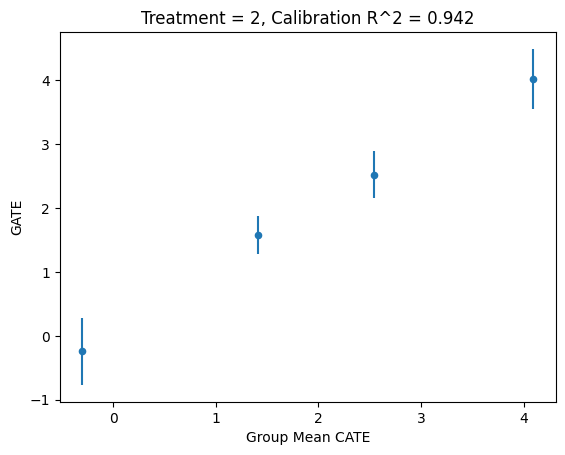

In [15]:
my_dr_tester.plot_cal(2)

In [10]:
my_dr_tester = DRtester(reg_y, reg_t).fit_nuisance(Xval, Dval, Yval)

Ztrain = Xtrain[:, 1]
Zval = Xval[:, 1]
my_dr_tester.fit_cate(reg_cate, Zval)

In [11]:
my_dr_tester.fit_cate(reg_cate, Zval, Ztrain)

Exception: Nuisance models fit fit (cv) in validation sample but Ztrain is specified

In [12]:
print(my_dr_tester.evaluate_blp().blp_res)

   treatment  blp_est  blp_se  blp_pval
0          1   -0.097   0.063     0.126
1          2    0.726   0.068     0.000


In [13]:
my_dr_tester.evaluate_cal()

Exception: Must fit nuisance/CATE models on training sample data to use calibration test

In [14]:
my_dr_tester.evaluate_qini()

Exception: CATE not yet fitted - must provide Zval and CATE estimator

In [8]:
my_dr_tester = DRtester(reg_y, reg_t).fit_nuisance(Xval, Dval, Yval, Xtrain, Dtrain, Ytrain)

# Simple classifier and regressor for propensity, outcome, and cate
reg_cate_1 = GradientBoostingRegressor(learning_rate=0.1, random_state=10)
reg_cate_2 = GradientBoostingRegressor(learning_rate=0.5, random_state=1)

Ztrain = Xtrain[:, 1]
Zval = Xval[:, 1]

In [9]:
my_dr_tester = my_dr_tester.evaluate_all(reg_cate_1, Zval, Ztrain)
print(my_dr_tester.df_res)

   treatment  blp_est  blp_se  blp_pval  qini_coeff  qini_se  qini_pval  \
0          1   -0.053   0.069      0.44      -0.003    0.016      0.426   
1          2    0.831   0.068      0.00       0.413    0.019      0.000   

   cal_r_squared  
0         -3.974  
1          0.921  


In [10]:
my_dr_tester = my_dr_tester.evaluate_all(reg_cate_2, Zval, Ztrain)
print(my_dr_tester.df_res)

   treatment  blp_est  blp_se  blp_pval  qini_coeff  qini_se  qini_pval  \
0          1   -0.014   0.034     0.668       0.005    0.016      0.388   
1          2    0.456   0.042     0.000       0.341    0.018      0.000   

   cal_r_squared  
0         -7.464  
1          0.568  
